# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/projects/wgong/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [2]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [3]:
model_name = "qwen2.5-coder:1.5b" # "qwen2.5-coder"  # 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
    'options': {
        'gpu': True,
    }
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [5]:
vn = MyVanna(config=CONFIG)

In [6]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [7]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [8]:
vn.run_sql_is_set

True

In [9]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [13]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


## Ask AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warm-up





# QUESTION :  How many customers are there



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM customers


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Assuming df is your pandas DataFrame containing the results of the query
if len(df) == 1:
    fig = px.indicator(label="Customers", value=df.iloc[0]['COUNT(*)'])
else:
    fig = px.line(title='Customers', x=df.index, y=df['COUNT(*)'], markers=True)

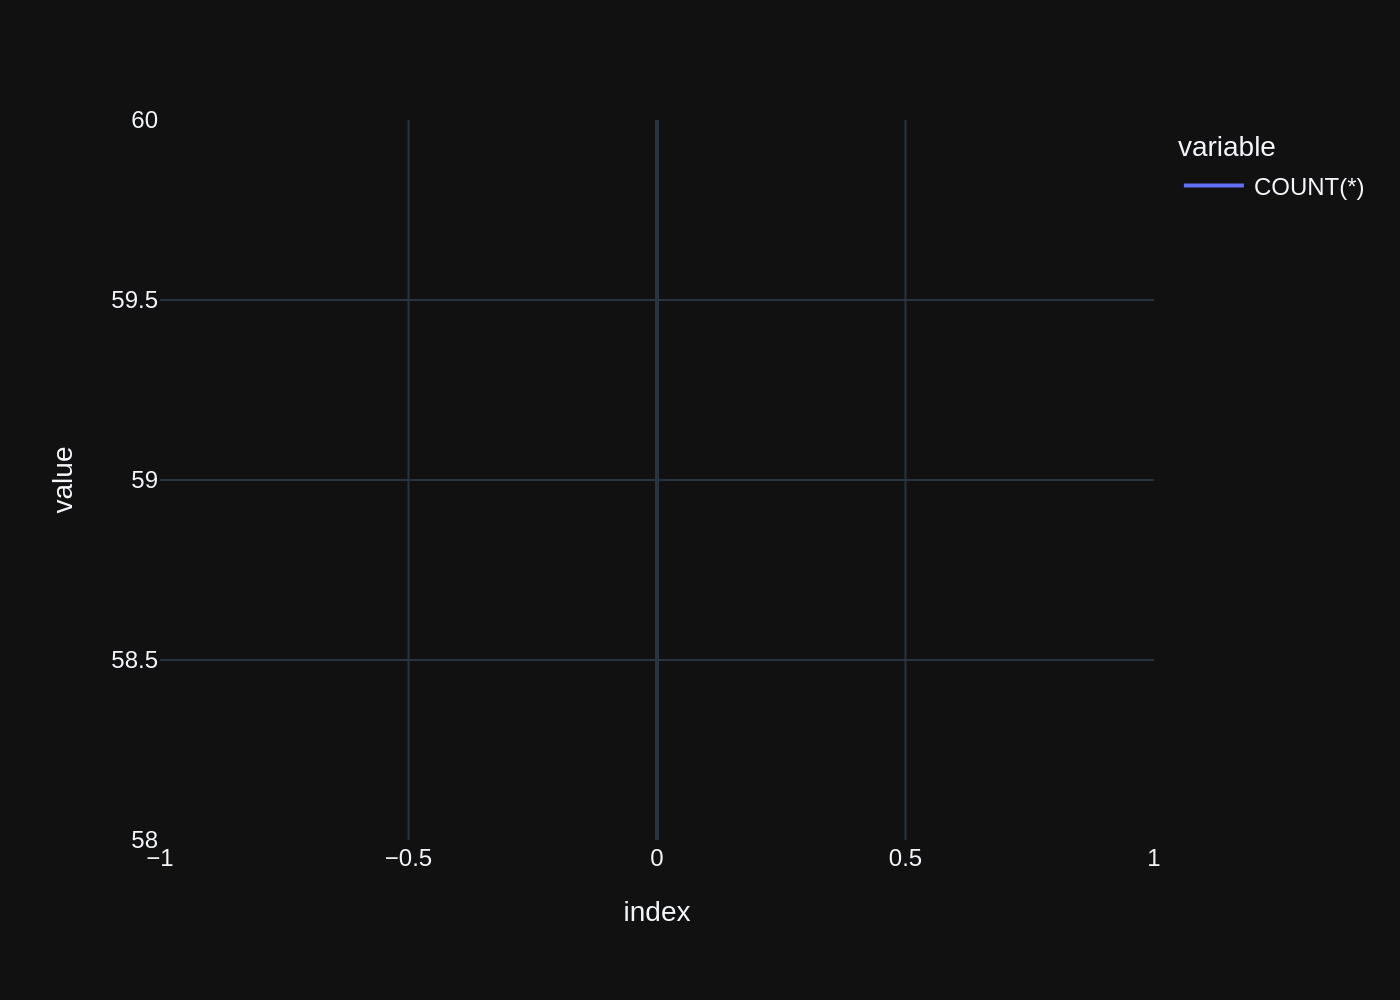

elapsed_time = 2.28916335105896


In [14]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Loop over questions

In [15]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,artists
2,customers
3,employees
4,genres
5,invoice_items
6,invoices
7,media_types
8,playlist_track
9,playlists



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Assuming df is already defined and contains your data

if len(df) == 1:
    fig = px.indicator(
        value=df.iloc[0][0],
        title='Table Name',
        description='The only table in the database.',
        text=['This is the only table in the database.']
    )
else:
    # If there are multiple rows, create a line chart
    fig = px.line(df, x='name', y=df['type'], title='Tables and Their Types')

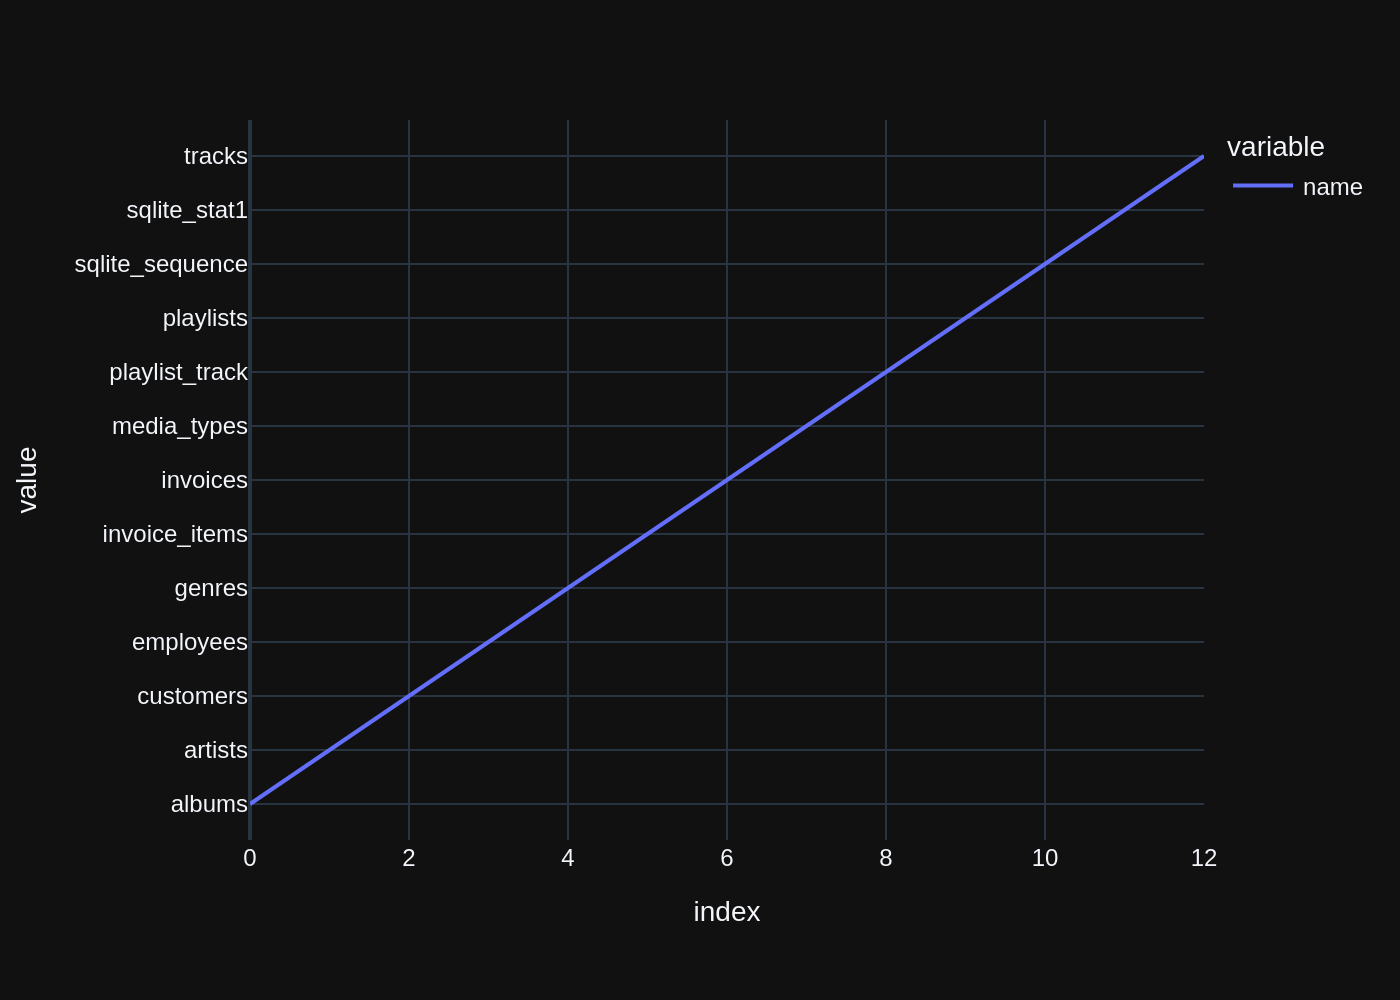





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * FROM invoices LIMIT 20



[( <SQL> )]
generated SQL statement



SELECT * FROM invoices LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
7,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
8,9,42,2009-02-02 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,3.96
9,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.line(title='Single Data Point', data_frame=df)
else:
    fig = px.scatter(title='Scatter Plot of Invoice Amounts', x='InvoiceId', y='Total')

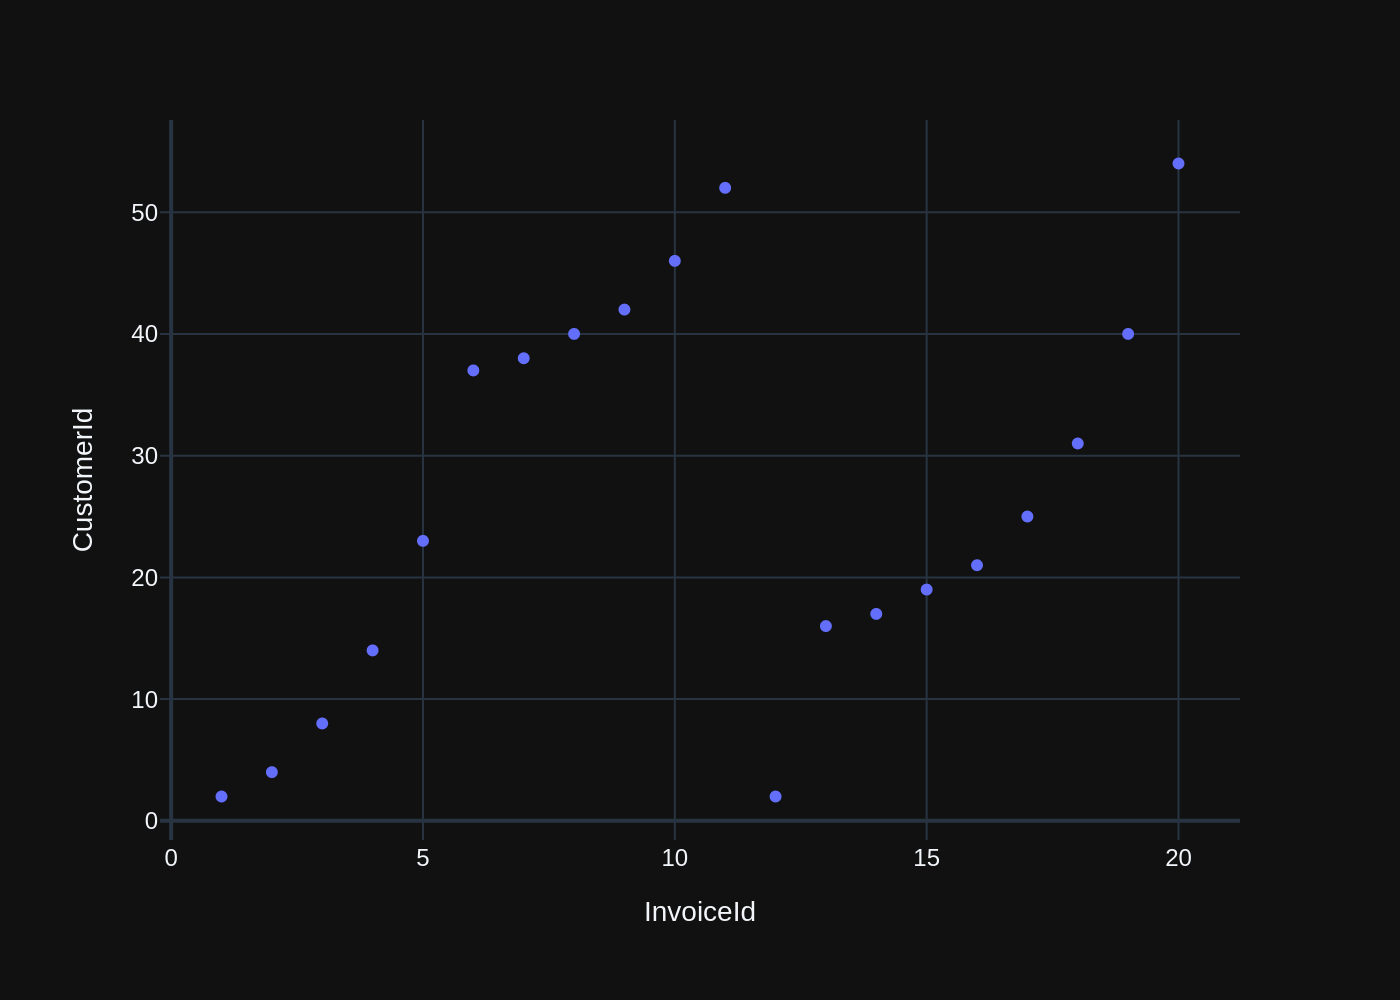





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM customers LIMIT 20


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Create a line chart for the single value
fig = px.line(df, y='COUNT(*)', title='Number of Customers')

# Display the chart

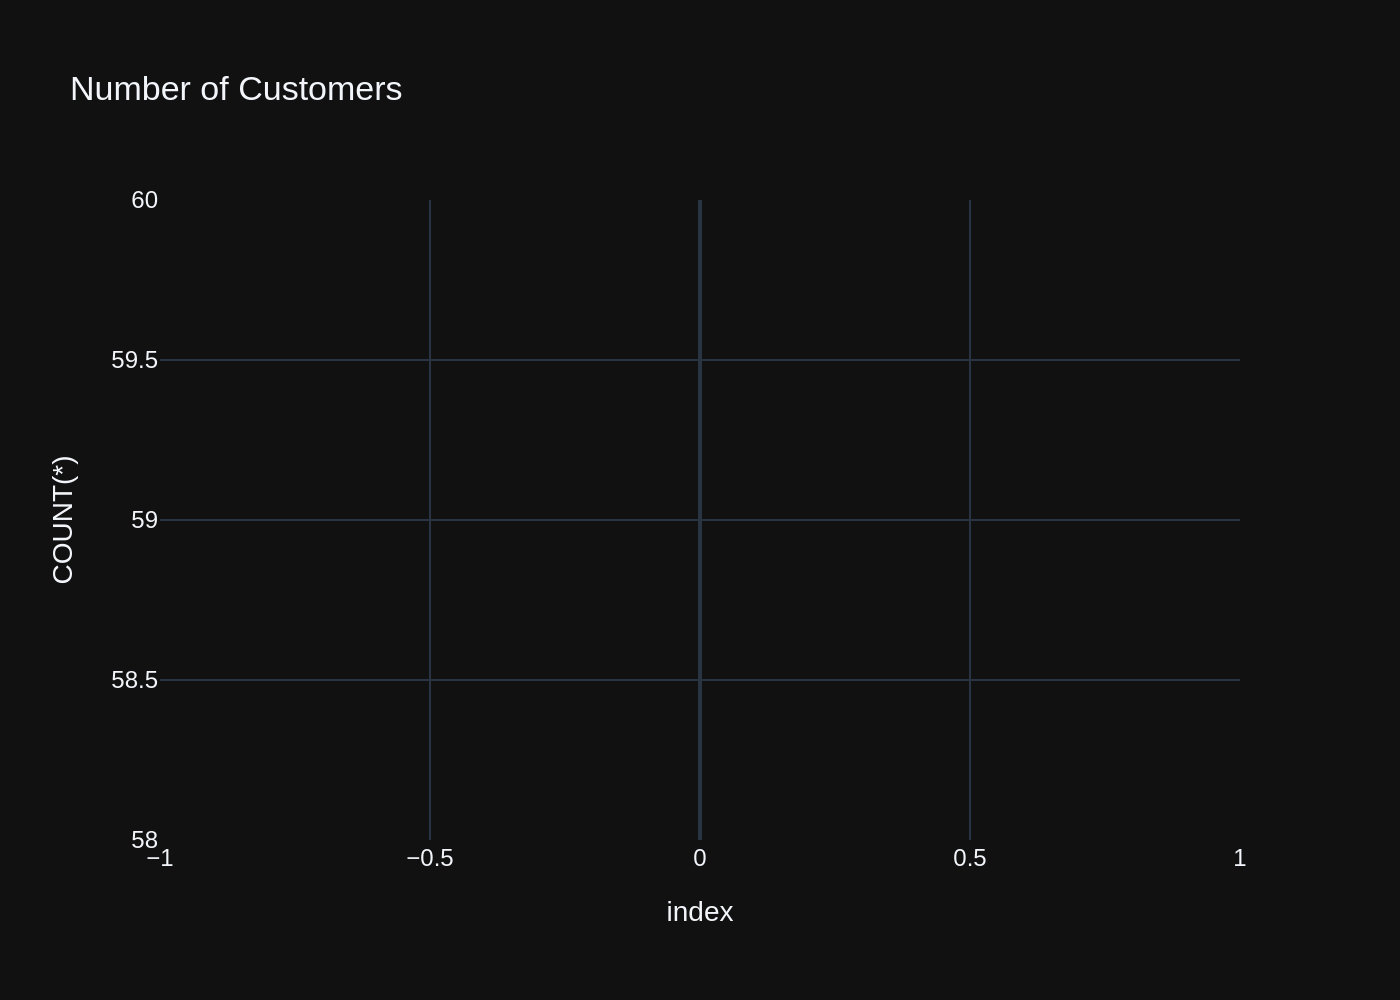





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT country FROM customers GROUP BY country ORDER BY count(*) DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,Country
0,USA
1,Canada
2,France
3,Brazil
4,Germany



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Plotting the chart
fig = px.choropleth(df, locations='Country', locationmode="country names", color='count(*)', 
                   hover_name='Country', title='Top 5 Countries Customers Come From')

# Displaying the plot

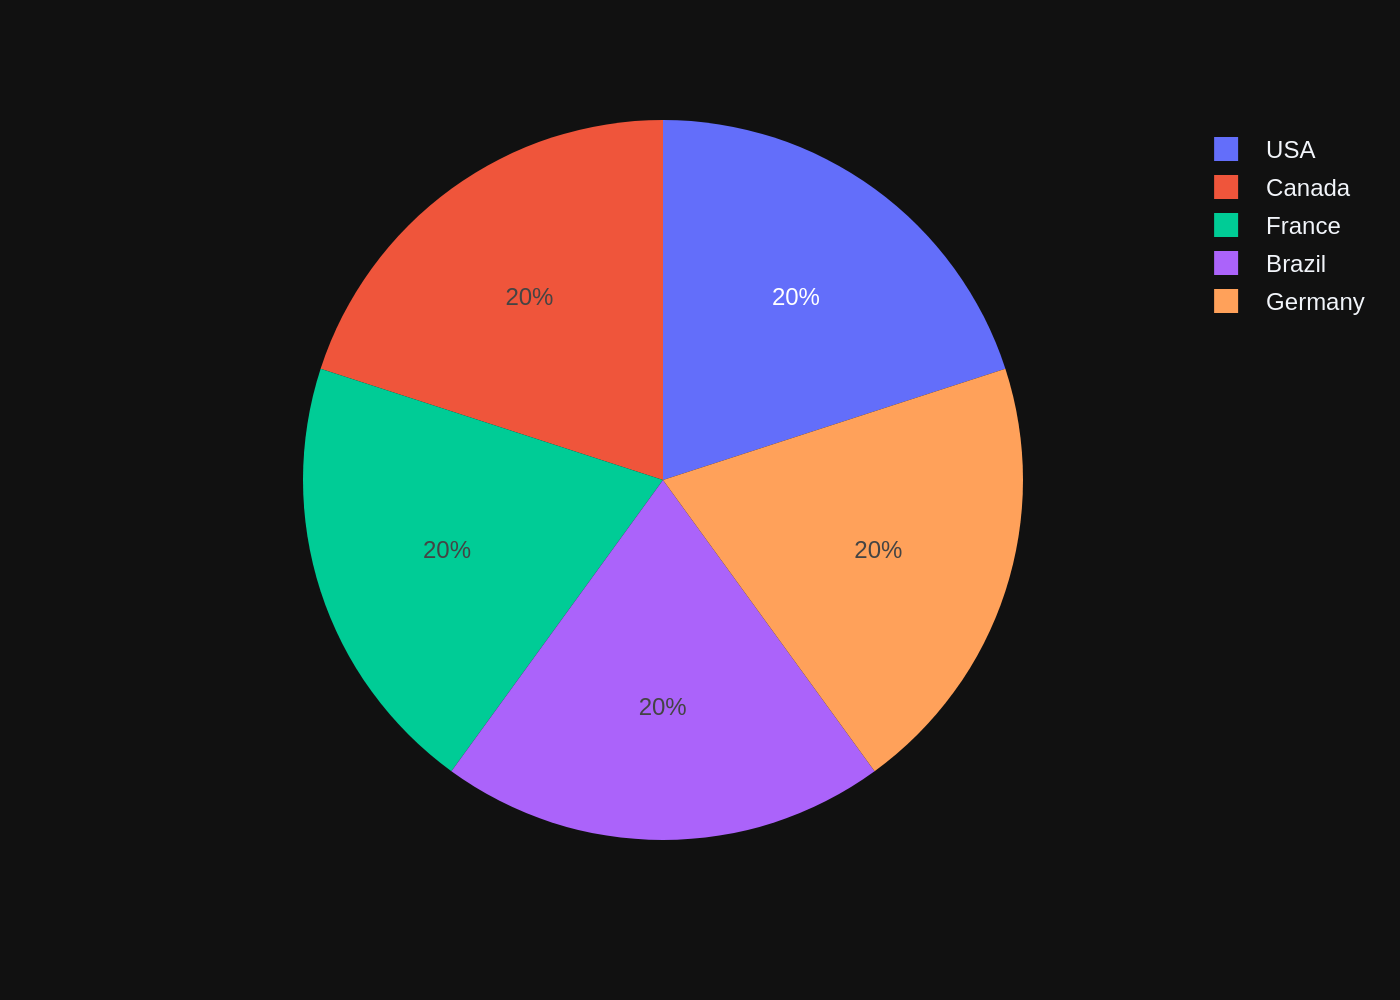





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Title, T2.Name FROM albums AS T1 INNER JOIN artists AS T2 ON T1.ArtistId = T2.ArtistId ORDER BY T1.Title


[( <DataFrame> )]
queried dataframe



,Title,Name
0,...And Justice For All,Metallica
1,20th Century Masters - The Millennium Collecti...,Scorpions
2,"A Copland Celebration, Vol. I",Aaron Copland & London Symphony Orchestra
3,A Matter of Life and Death,Iron Maiden
4,A Real Dead One,Iron Maiden
5,A Real Live One,Iron Maiden
6,A Soprano Inspired,"Britten Sinfonia, Ivor Bolton & Lesley Garrett"
7,A TempestadeTempestade Ou O Livro Dos Dias,Legião Urbana
8,A-Sides,Soundgarden
9,Ace Of Spades,Motörhead



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(
        value=df.iloc[0],
        description='Single Value'
    )
else:
    fig = px.line(df, x='Title', y='Name')

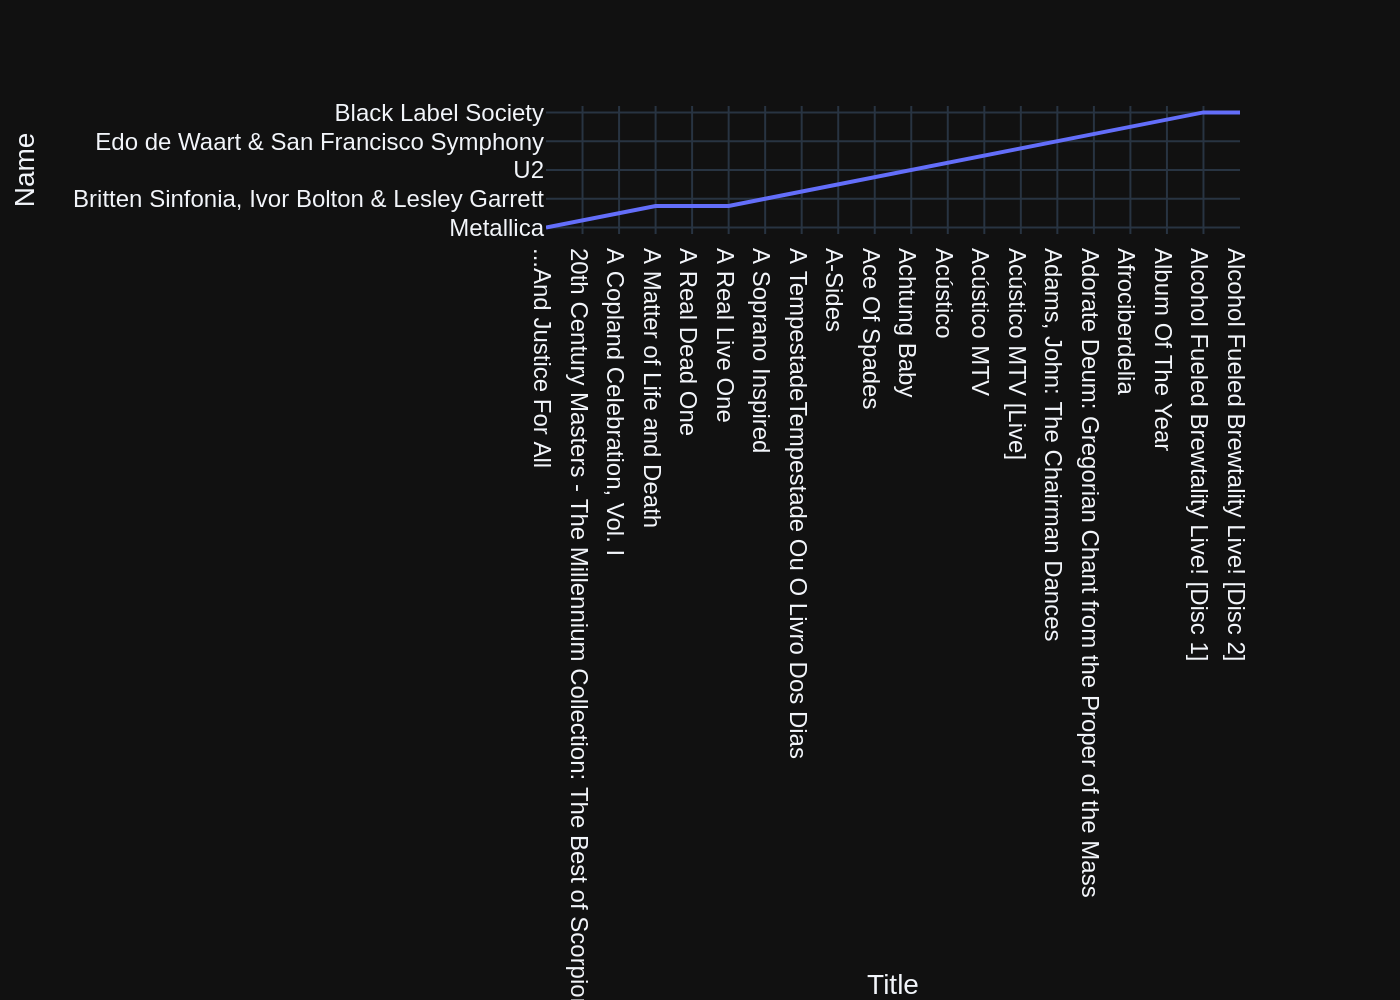





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM tracks WHERE LOWER(Name) LIKE '%what%'


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,26,What It Takes,5,1,1,"Steven Tyler, Joe Perry, Desmond Child",310622,10144730,0.99
1,88,What You Are,10,1,1,Audioslave/Chris Cornell,249391,5988186,0.99
2,130,Do what cha wanna,13,1,2,George Duke,274155,9018565,0.99
3,342,What is and Should Never Be,30,1,1,Jimmy Page/Robert Plant,260675,8497116,0.99
4,607,So What,48,1,2,Miles Davis,564009,18360449,0.99
5,960,What A Day,76,1,1,"Mike Bordin, Billy Gould, Mike Patton",158275,5203430,0.99
6,1000,What If I Do?,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",302994,9929799,0.99
7,1039,What Now My Love,83,1,12,carl sigman/gilbert becaud/pierre leroyer,149995,4913383,0.99
8,1145,Whatsername,89,1,4,Green Day,252316,8244843,0.99
9,1440,"Whatever It Is, I Just Can't Stop",116,1,1,"Jay Kay/Kay, Jay",247222,8249453,0.99



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(data_frame=df)
else:
    fig = px.line(df, x='TrackId', y='Milliseconds')

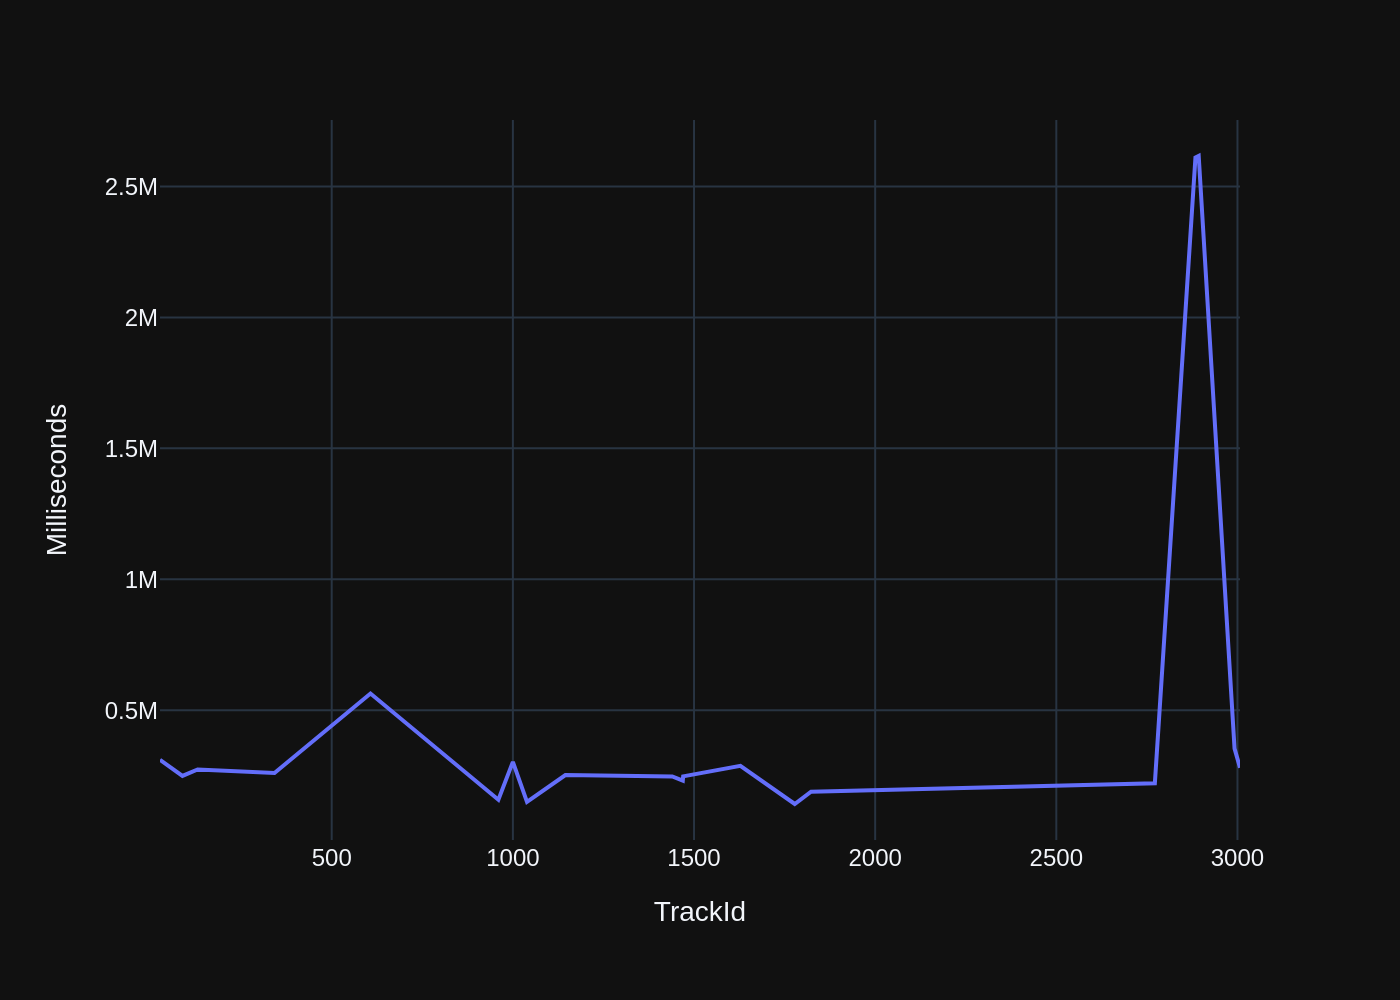





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) ,  CustomerId FROM invoices GROUP BY CustomerId ORDER BY CustomerId LIMIT 20


[( <DataFrame> )]
queried dataframe



,COUNT(*),CustomerId
0,7,1
1,7,2
2,7,3
3,7,4
4,7,5
5,7,6
6,7,7
7,7,8
8,7,9
9,7,10



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='COUNT(*)')

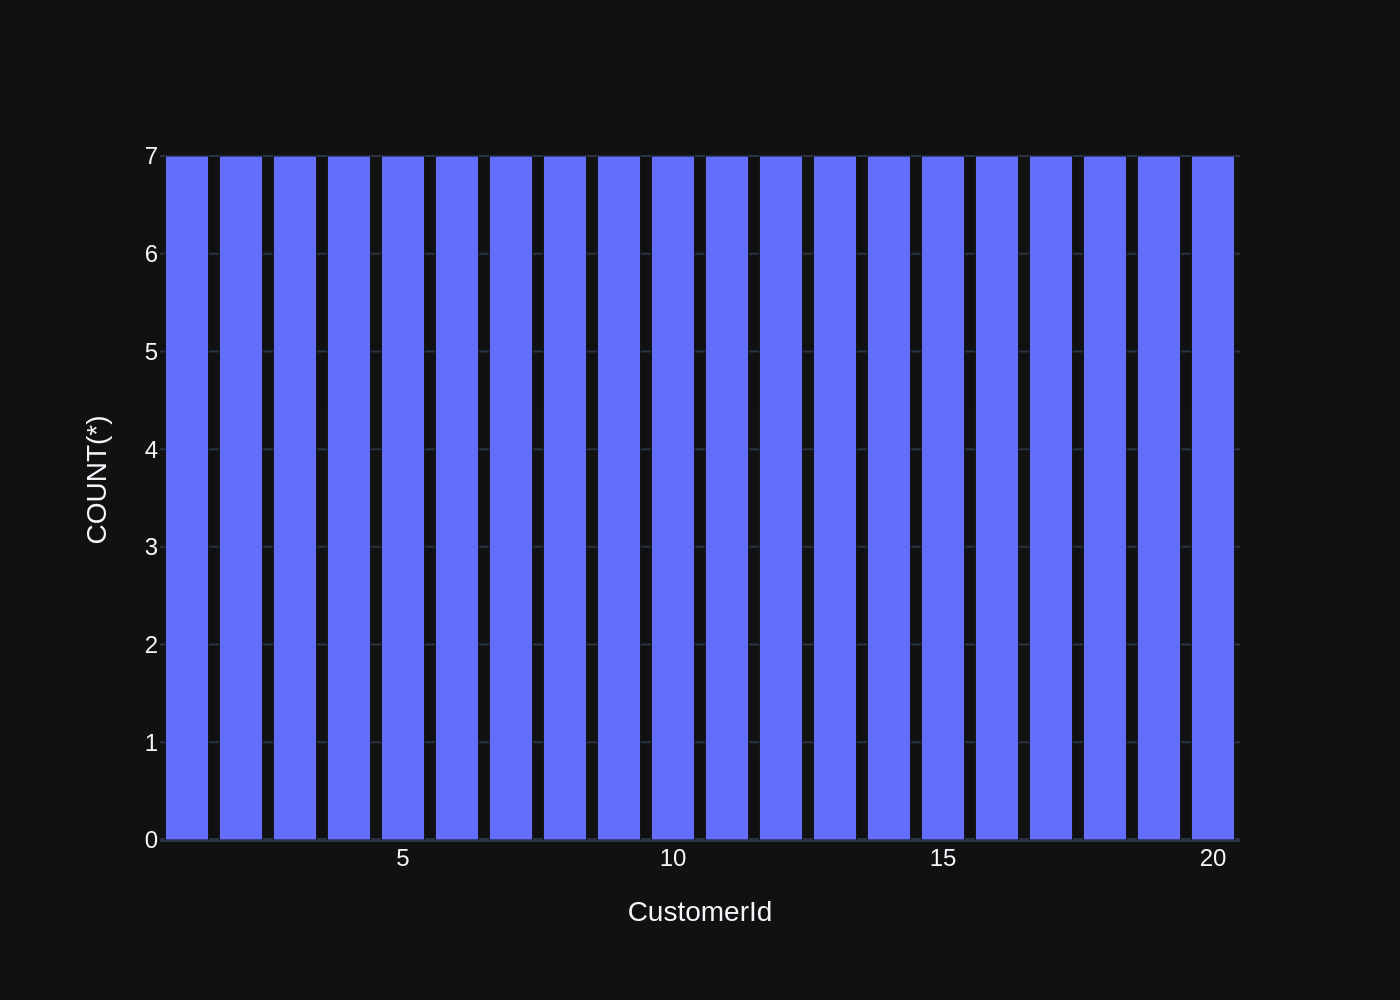





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) ,  billingcountry FROM invoices GROUP BY BillingCountry ORDER BY BillingCountry LIMIT 20


[( <DataFrame> )]
queried dataframe



,COUNT(*),BillingCountry
0,7,Argentina
1,7,Australia
2,7,Austria
3,7,Belgium
4,35,Brazil
5,56,Canada
6,7,Chile
7,14,Czech Republic
8,7,Denmark
9,7,Finland



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Create a bar chart to show the total number of invoices per country
if len(df) == 1:
    # Use an indicator to display a single value
    fig = px.indicator(labels={'value': 'Total Invoices'}, value=df['COUNT(*)'].values[0])
else:
    # Plot the data as a bar chart
    fig = px.bar(data_frame=df, x='BillingCountry', y='COUNT(*), text='COUNT(*)')

# Show the plot

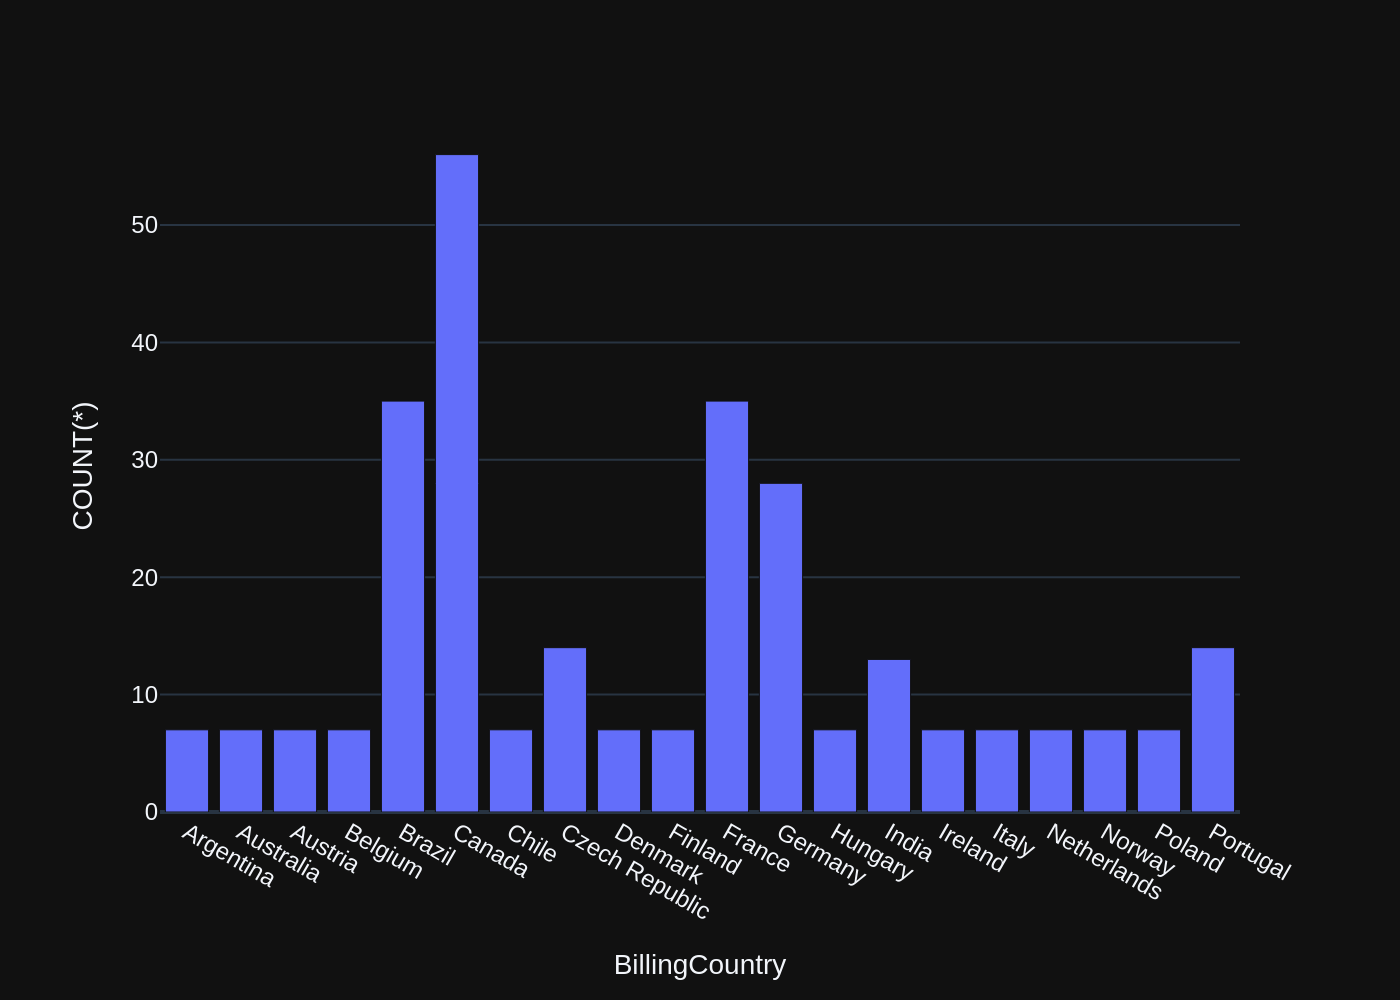





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM invoices WHERE Total > 10 LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
5,40,36,2009-06-15 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,13.86
6,47,15,2009-07-16 00:00:00,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,13.86
7,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86
8,61,32,2009-09-16 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,13.86
9,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        data_frame=df,
        title='Single Value',
        value=df.iloc[0],
        mode="number+delta",
    )
else:
    fig = px.bar(
        df,
        x='InvoiceId',
        y='Total',
        title='Invoices with Total Exceeding $10'
    )

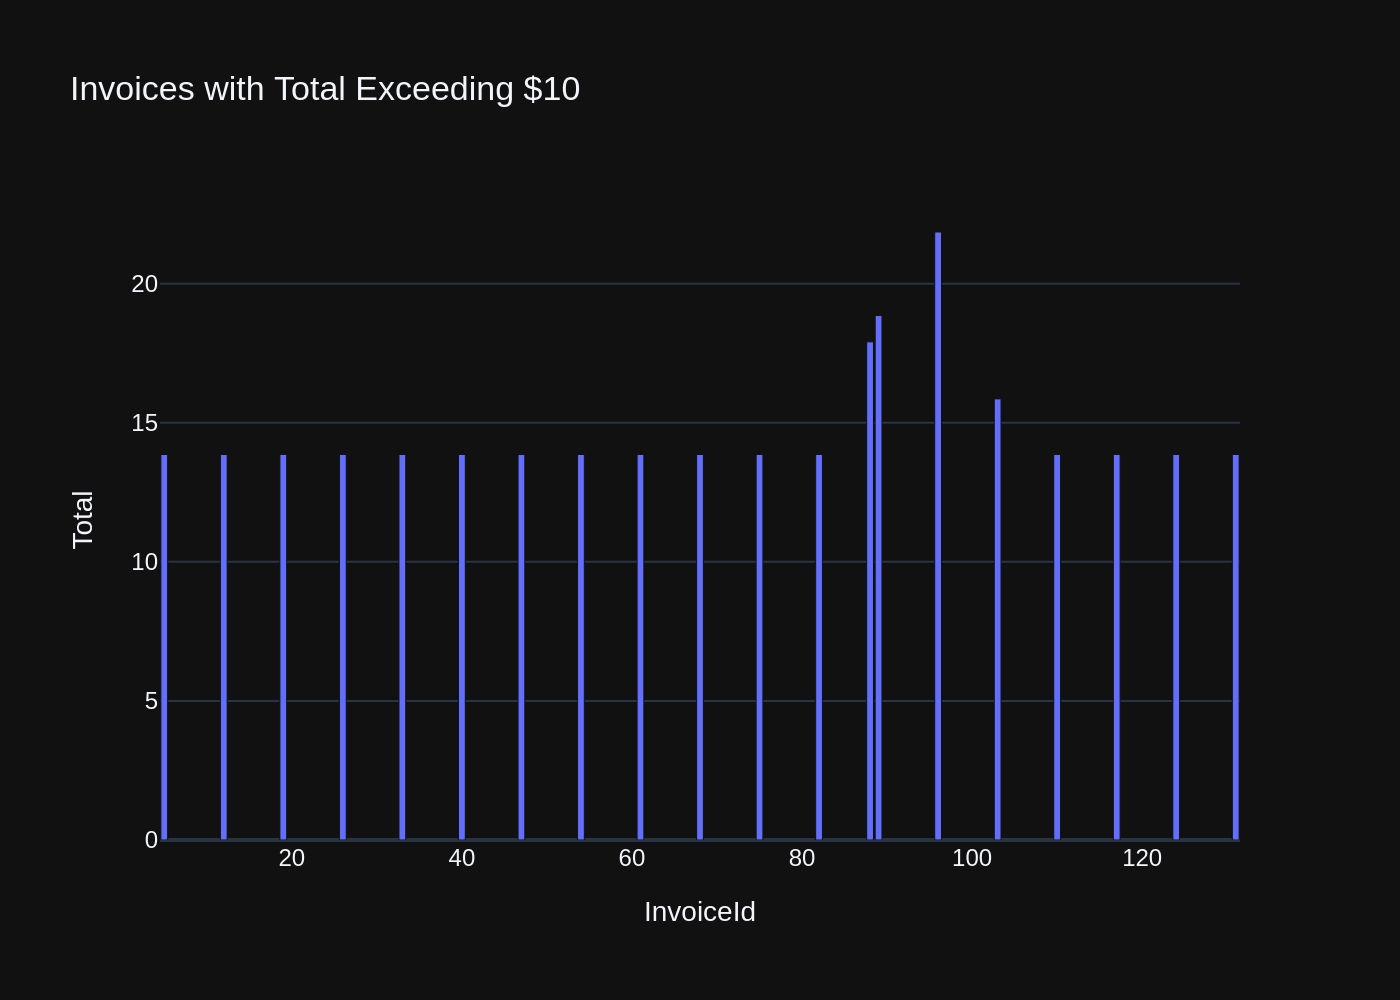





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM invoices WHERE InvoiceDate >= '2010-01-01' GROUP BY Total LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,90,21,2010-01-26 00:00:00,801 W 4th Street,Reno,NV,USA,89503,0.99
1,84,43,2010-01-08 00:00:00,"68, Rue Jouvence",Dijon,None,France,21000,1.98
2,97,59,2010-02-26 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,1.99
3,203,40,2011-06-19 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,2.98
4,86,47,2010-01-09 00:00:00,"Via Degli Scipioni, 43",Rome,RM,Italy,00192,3.96
5,98,1,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
6,94,30,2010-02-10 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,5.94
7,87,51,2010-01-10 00:00:00,Celsiusg. 9,Stockholm,None,Sweden,11230,6.94
8,205,44,2011-06-20 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,7.96
9,95,36,2010-02-13 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,8.91



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

# Check if there is only one row in the DataFrame
if df.shape[0] == 1:
    # Create a line chart using an indicator
    fig = go.Figure(data=[go.Indicator(mode="number", value=df.values[0], title_text="Total Amount Invoiced")])
else:
    # Create a bar chart of total amount invoiced over time
    fig = go.Figure(data=[
        go.Bar(x=df['InvoiceDate'], y=df['Total'])
    ])

# Show the plot

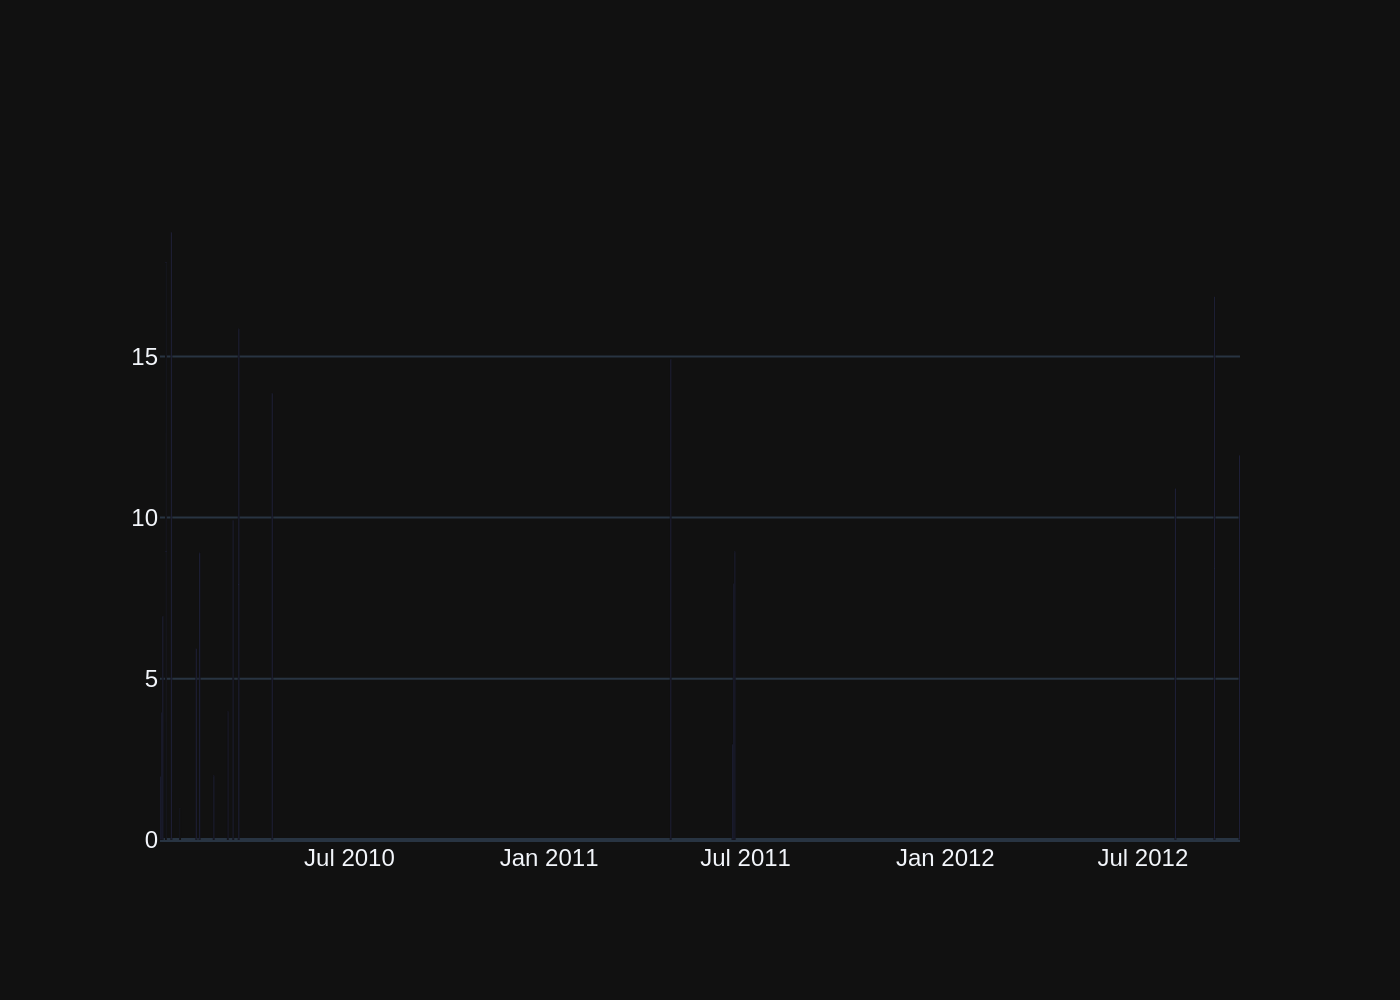





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.FirstName ,  T1.LastName ,  T2.FirstName ,  T2.LastName FROM employees AS T1 INNER JOIN employees AS T2 ON T1.ReportsTo = T2.EmployeeId ORDER BY T1.FirstName ,  T1.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,FirstName,LastName
0,Jane,Peacock,Nancy,Edwards
1,Laura,Callahan,Michael,Mitchell
2,Margaret,Park,Nancy,Edwards
3,Michael,Mitchell,Andrew,Adams
4,Nancy,Edwards,Andrew,Adams
5,Robert,King,Michael,Mitchell
6,Steve,Johnson,Nancy,Edwards



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='FirstName', y='LastName')

if len(df) == 1:
    fig.update_traces(indicator=px.indicator(mode="number"))
else:
    pass


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.FirstName ,  T1.LastName ,  T2.FirstName ,  T2.LastName FROM employees AS T1 INNER JOIN employees AS T2 ON T1.ReportsTo = T2.EmployeeId ORDER BY T1.FirstName ,  T1.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,FirstName,LastName
0,Jane,Peacock,Nancy,Edwards
1,Laura,Callahan,Michael,Mitchell
2,Margaret,Park,Nancy,Edwards
3,Michael,Mitchell,Andrew,Adams
4,Nancy,Edwards,Andrew,Adams
5,Robert,King,Michael,Mitchell
6,Steve,Johnson,Nancy,Edwards



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(
        value=df.values[0],
        title="Single Value",
        description="This indicator shows a single value."
    )
else:
    fig = px.line(df, x='FirstName', y='LastName')


[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.FirstName ,  T1.LastName ,  T2.FirstName ,  T2.LastName FROM employees AS T1 INNER JOIN employees AS T2 ON T1.ReportsTo = T2.EmployeeId ORDER BY T1.FirstName ,  T1.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,FirstName,LastName
0,Jane,Peacock,Nancy,Edwards
1,Laura,Callahan,Michael,Mitchell
2,Margaret,Park,Nancy,Edwards
3,Michael,Mitchell,Andrew,Adams
4,Nancy,Edwards,Andrew,Adams
5,Robert,King,Michael,Mitchell
6,Steve,Johnson,Nancy,Edwards



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Create the indicator for a single value
if len(df) == 1:
    fig = px.indicator(
        values=df.values[0],
        labels={
            "values": "Single Value",
            "label": "",
        }
    )
else:
    # Create the data for the line chart
    fig = px.line(
        df,
        x="FirstName",
        y="LastName",
        title="Employees by Reporting Manager",
        hover_data=["ReportsTo"]
    )

# Show the plot


[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.FirstName ,  T1.LastName ,  T2.FirstName ,  T2.LastName FROM employees AS T1 INNER JOIN employees AS T2 ON T1.ReportsTo = T2.EmployeeId ORDER BY T1.FirstName ,  T1.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,FirstName,LastName
0,Jane,Peacock,Nancy,Edwards
1,Laura,Callahan,Michael,Mitchell
2,Margaret,Park,Nancy,Edwards
3,Michael,Mitchell,Andrew,Adams
4,Nancy,Edwards,Andrew,Adams
5,Robert,King,Michael,Mitchell
6,Steve,Johnson,Nancy,Edwards



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Assuming df is your DataFrame
if len(df) == 1:
    # Create an indicator plot if there's only one data point
    fig = px.line(
        x=[0], 
        y=df.iloc[0],
        labels={"x": "", "y": ""}, 
        title="Single Data Point", 
        template="plotly_white"
    )
else:
    # Create a line chart of the DataFrame
    fig = px.line(df, x="FirstName", y="LastName", hover_data=["ReportsTo"], title="Employee List")

# Display the plot





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT AVG(Total) ,  CustomerId FROM invoices GROUP BY CustomerId ORDER BY Average(Total) DESC LIMIT 20


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT avg(total) ,  customerid FROM invoices GROUP BY customerid ORDER BY avg(total) DESC LIMIT 20


[( <DataFrame> )]
queried dataframe



,avg(total),CustomerId
0,7.088571,6
1,6.802857,26
2,6.660000,57
3,6.517143,45
4,6.517143,46
5,6.231429,24
6,6.231429,28
7,6.231429,37
8,6.106667,59
9,6.088571,7



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import pandas as pd
   import plotly.express as px

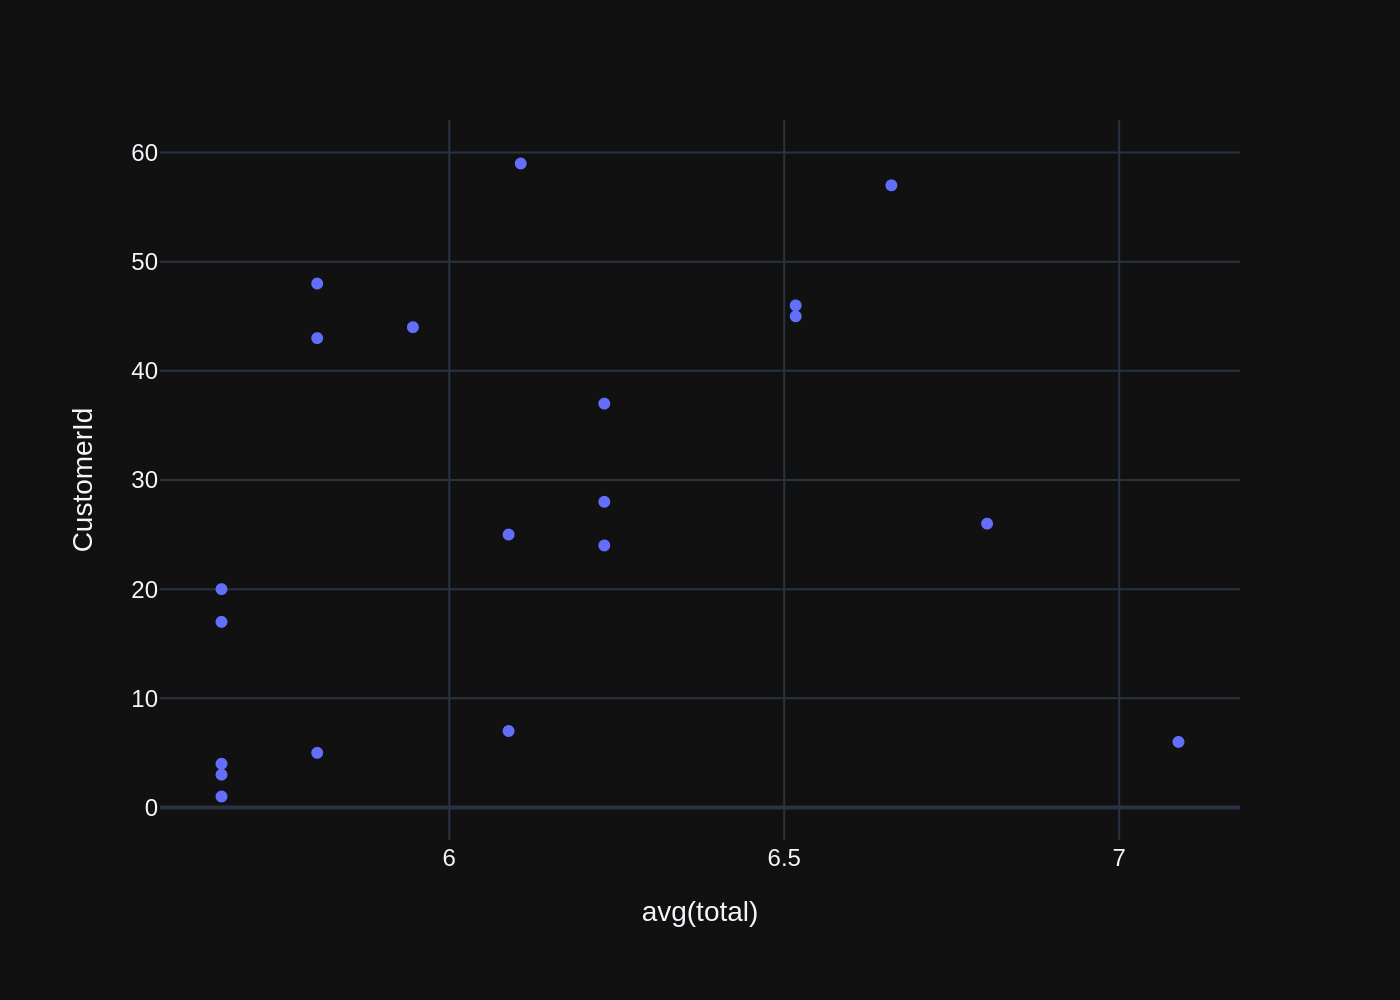





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name ,  UnitPrice FROM tracks GROUP BY Name ORDER BY UnitPrice DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,Name,UnitPrice
0,Women's Appreciation,1.99
1,White Rabbit,1.99
2,Whatever the Case May Be,1.99
3,What Kate Did,1.99
4,"War of the Gods, Pt. 2",1.99



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.line(df, x='Name', y='UnitPrice')

if df.shape[0] == 1:
    fig.update_traces(mode="markers")
else:

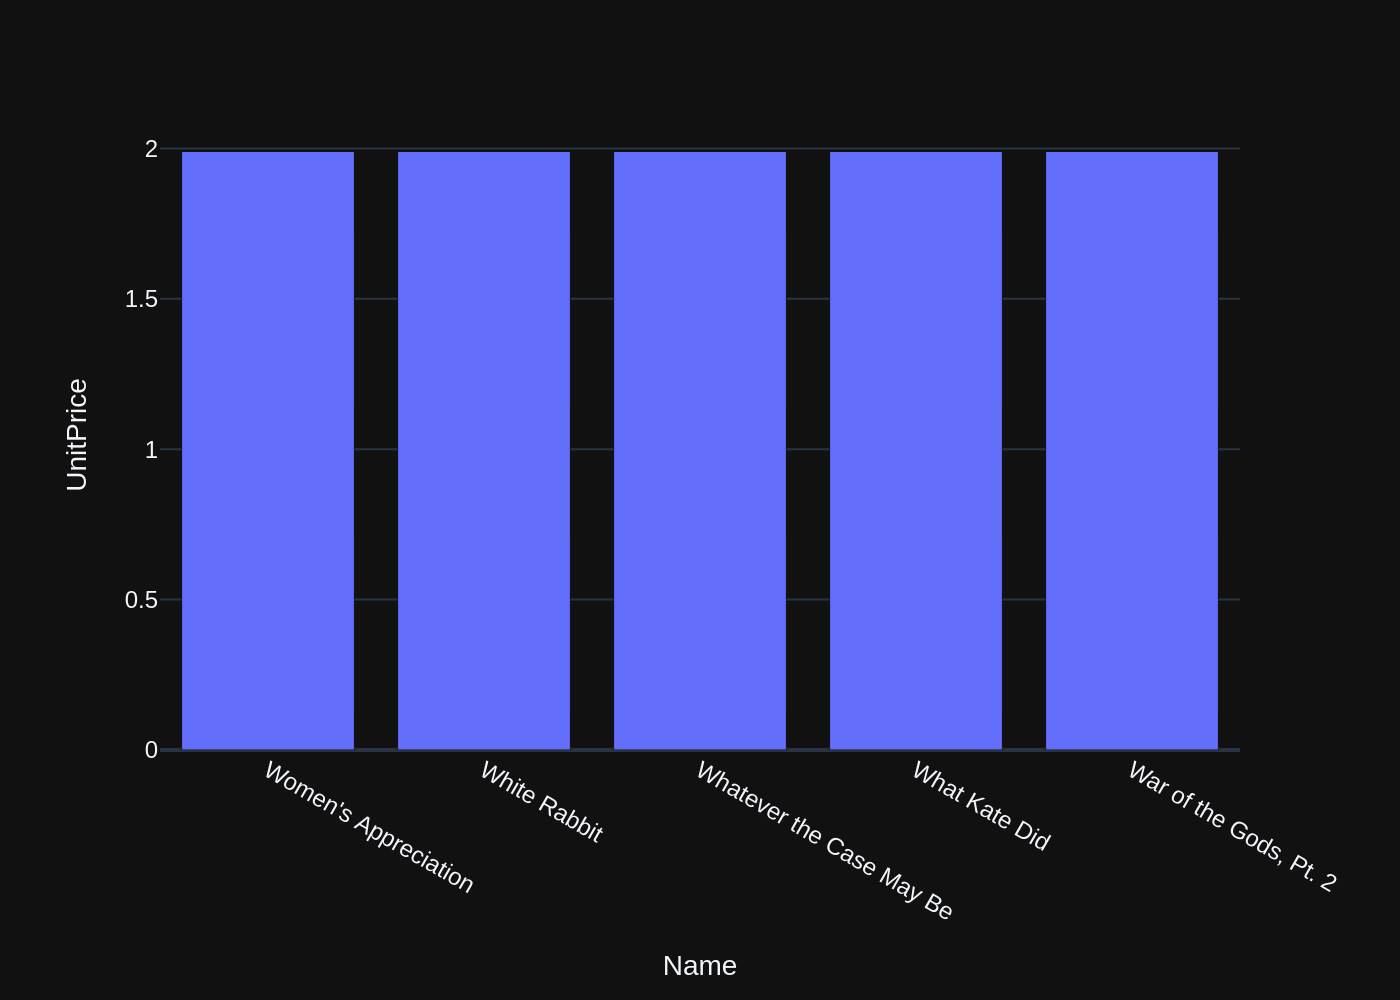





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.Name ,  COUNT(T1.GenreId) FROM tracks AS T1 JOIN genres AS T2 ON T1.GenreId = T2.GenreId GROUP BY T2.Name ORDER BY Count(*) LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name,COUNT(T1.GenreId)
0,"Die Zauberflöte, K.620: ""Der Hölle Rache Kocht...",1
1,Money,12
2,Battlestar Galactica: The Story So Far,13
3,Samba Da Bênção,15
4,The Convict,17
5,My Way,24
6,"Crossroads, Pt. 1",26
7,Wildest Dreams,28
8,Pura Elegancia,28
9,Just Another Story,30



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Assuming df has only one row or is already filtered to have data for plotting
df = df.dropna()  # Drop rows with NaN values if any

if len(df) == 1:
    fig = px.line(title='Track Count by Genre', x=df.index, y=df[0])
else:
    fig = px.bar(x=df['Name'], y=df['COUNT(T1.GenreId)'])

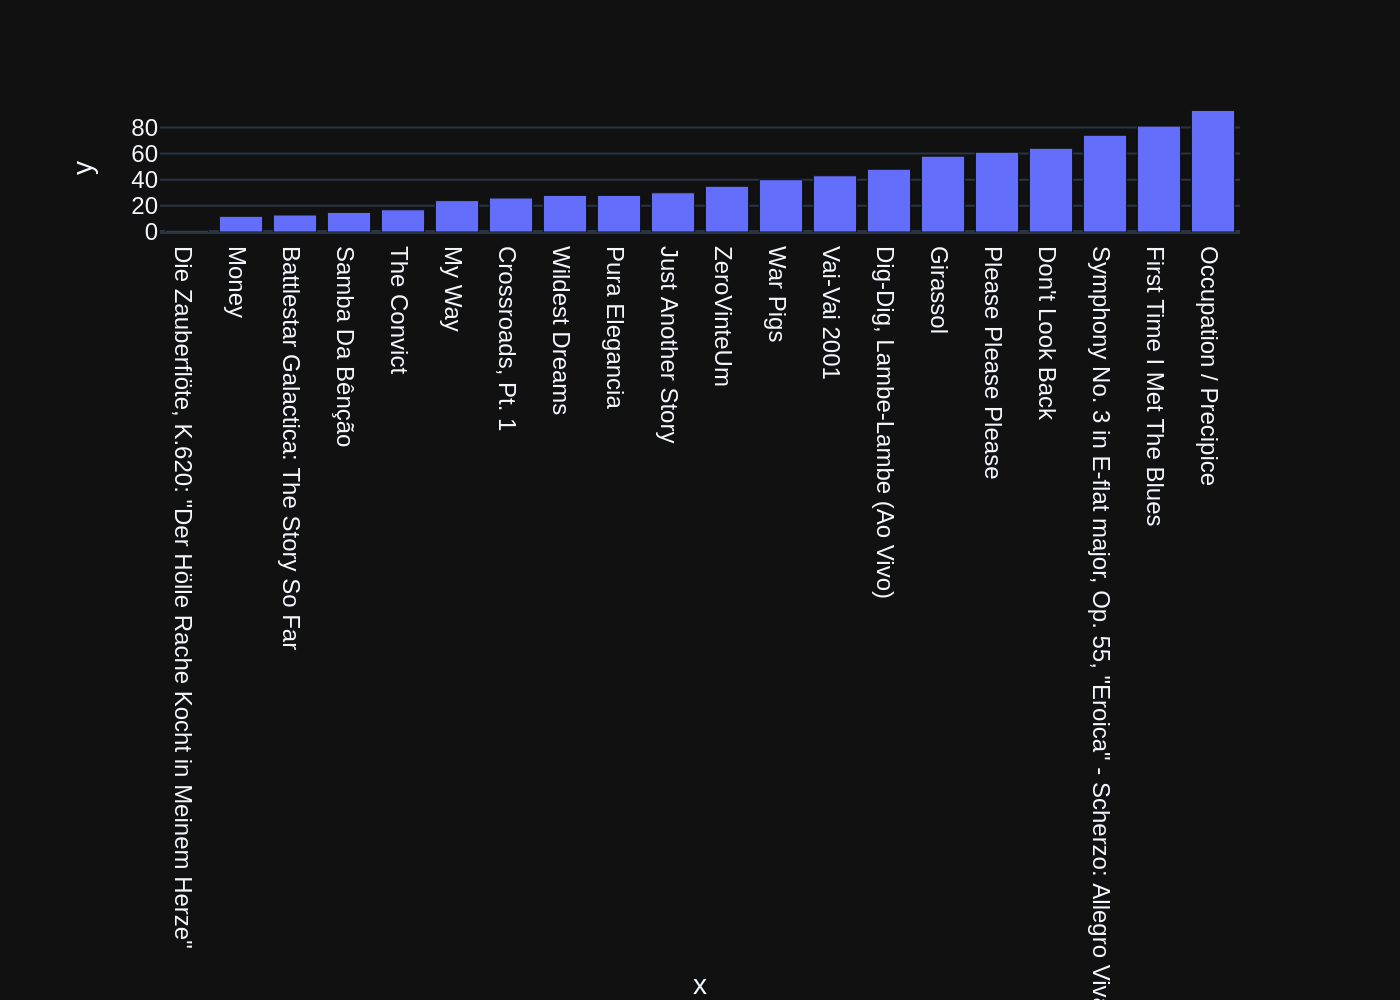





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name FROM genres WHERE GenreId NOT IN ( SELECT GenreId FROM tracks )


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM genres WHERE GenreId NOT IN ( SELECT DISTINCT genreid FROM tracks )


[( <DataFrame> )]
queried dataframe



,GenreId,Name



[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name FROM genres WHERE genreid NOT IN ( SELECT DISTINCT GenreId FROM tracks )


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name FROM genres WHERE genreid NOT IN ( SELECT genreid FROM tracks )


[( <DataFrame> )]
queried dataframe



,Name






# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE customerid NOT IN ( SELECT CustomerID FROM invoices ) LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE customerid NOT IN ( SELECT customerid FROM invoices )


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE customerid NOT IN ( SELECT customerid FROM invoices ) LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT count(*) ,  * FROM customers WHERE customerid NOT IN ( SELECT customerid FROM invoices ) LIMIT 20


[( <DataFrame> )]
queried dataframe



,count(*),CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,0,None,None,None,None,None,None,None,None,None,None,None,None,None



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Check if df contains only one row
if len(df) == 1:
    # Create an indicator chart
    fig = px.line(pandas.DataFrame({"Indicator": [df.iloc[0]["count(*)"]]}), x="Indicator", y="count(*)")
else:
    # If multiple rows, create a bar chart
    fig = px.bar(df, x="count(*)", y=df.columns.tolist(), title="Number of Customers by Category")

# Show the plot

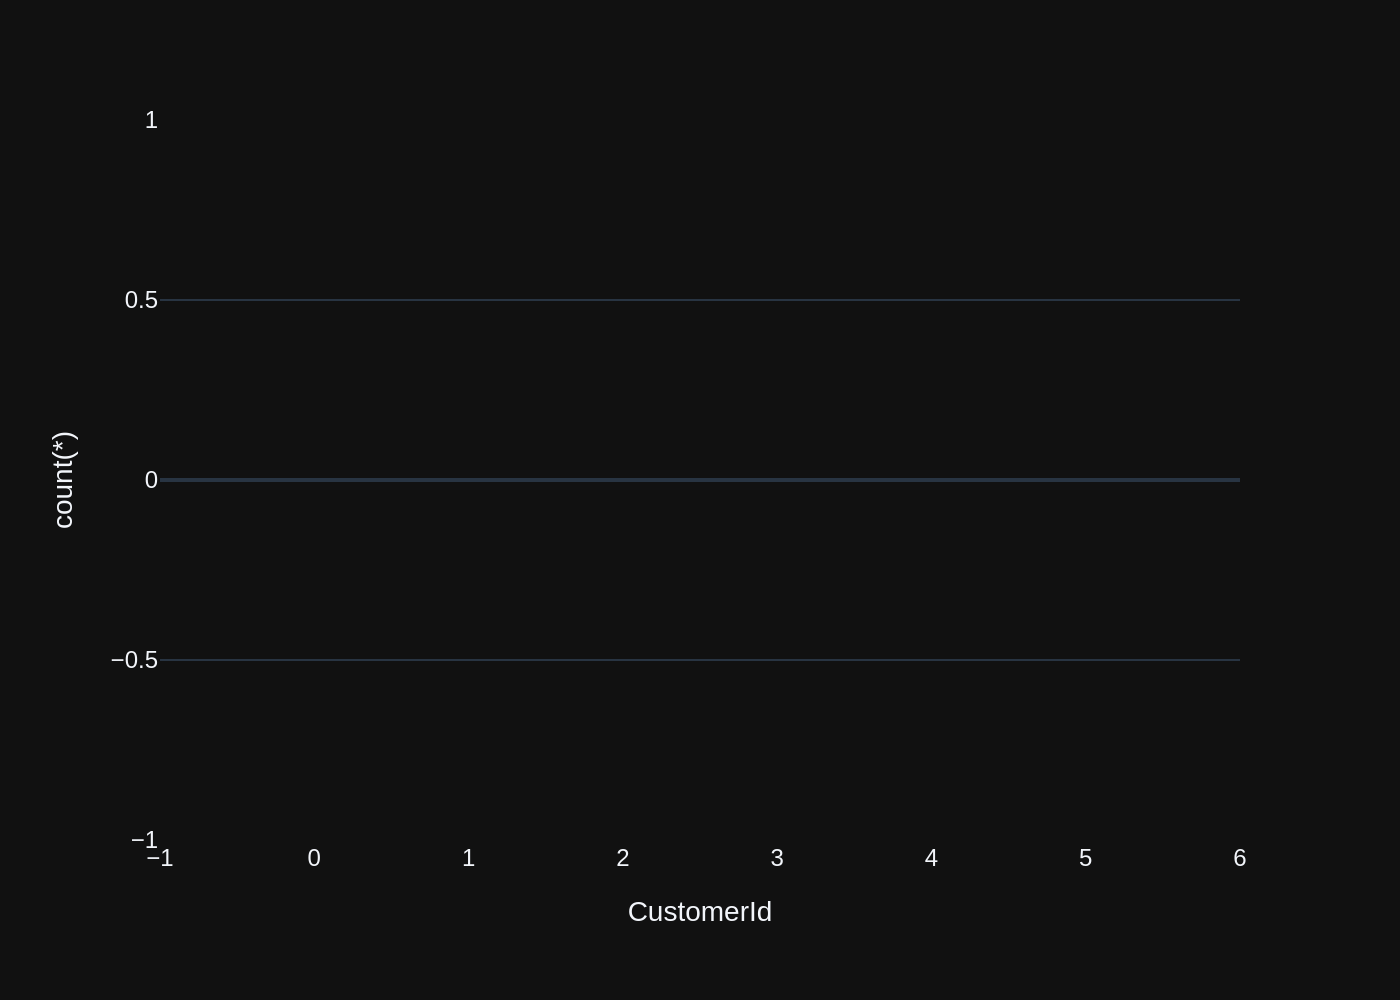





# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.Name ,  COUNT(T1.ArtistId) FROM artists AS T1 INNER JOIN albums ON T1.ArtistId = Albums.ArtistId INNER JOIN tracks ON Albums.AlbumId = Tracks.AlbumId GROUP BY T1.Name ORDER BY Count(*) DESC LIMIT 10


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name ,  count(*) FROM artists AS t1 JOIN albums as t2 ON t1.artistid = t2.artistid JOIN tracks AS t3 ON t2.albumid = t3.albumid GROUP BY name ORDER BY count(*) DESC LIMIT 10


[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.name ,  COUNT(T1.ArtistId) FROM artists AS T1 INNER JOIN albums ON T1.artistid = albums.ArtistId INNER JOIN tracks ON albums.AlbumId = tracks.AlbumID GROUP BY T1.Name ORDER BY Count(*) DESC LIMIT 10


[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.Name ,  COUNT(T1.ArtistId) FROM artists AS T1 INNER JOIN albums ON T1.ArtistId = Albums.ArtistId INNER JOIN tracks ON Albums.AlbumId = Tracks.AlbumId GROUP BY T1.Name ORDER BY Count(*) DESC LIMIT 10





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT firstname ,  lastname ,  email FROM customers WHERE country = 'Canada' ORDER BY firstname ,  lastname LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,Email
0,Aaron,Mitchell,aaronmitchell@yahoo.ca
1,Edward,Francis,edfrancis@yachoo.ca
2,Ellie,Sullivan,ellie.sullivan@shaw.ca
3,François,Tremblay,ftremblay@gmail.com
4,Jennifer,Peterson,jenniferp@rogers.ca
5,Mark,Philips,mphilips12@shaw.ca
6,Martha,Silk,marthasilk@gmail.com
7,Robert,Brown,robbrown@shaw.ca



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import pandas as pd
import plotly.express as px

# Assuming df is already defined and loaded with data
# df = pd.read_csv('your_dataset.csv')

# Check if there is only one value in the dataframe
if len(df) == 1:
    # Create a simple indicator chart
    fig = px.indicator(data_frame=df, targets={'Value': ['Email']}, title='Customer Information')
else:
    # Create a bar chart for all columns
    fig = px.bar(df, x='FirstName', y='LastName', color='Email', title='Customer Details')

# Show the plot

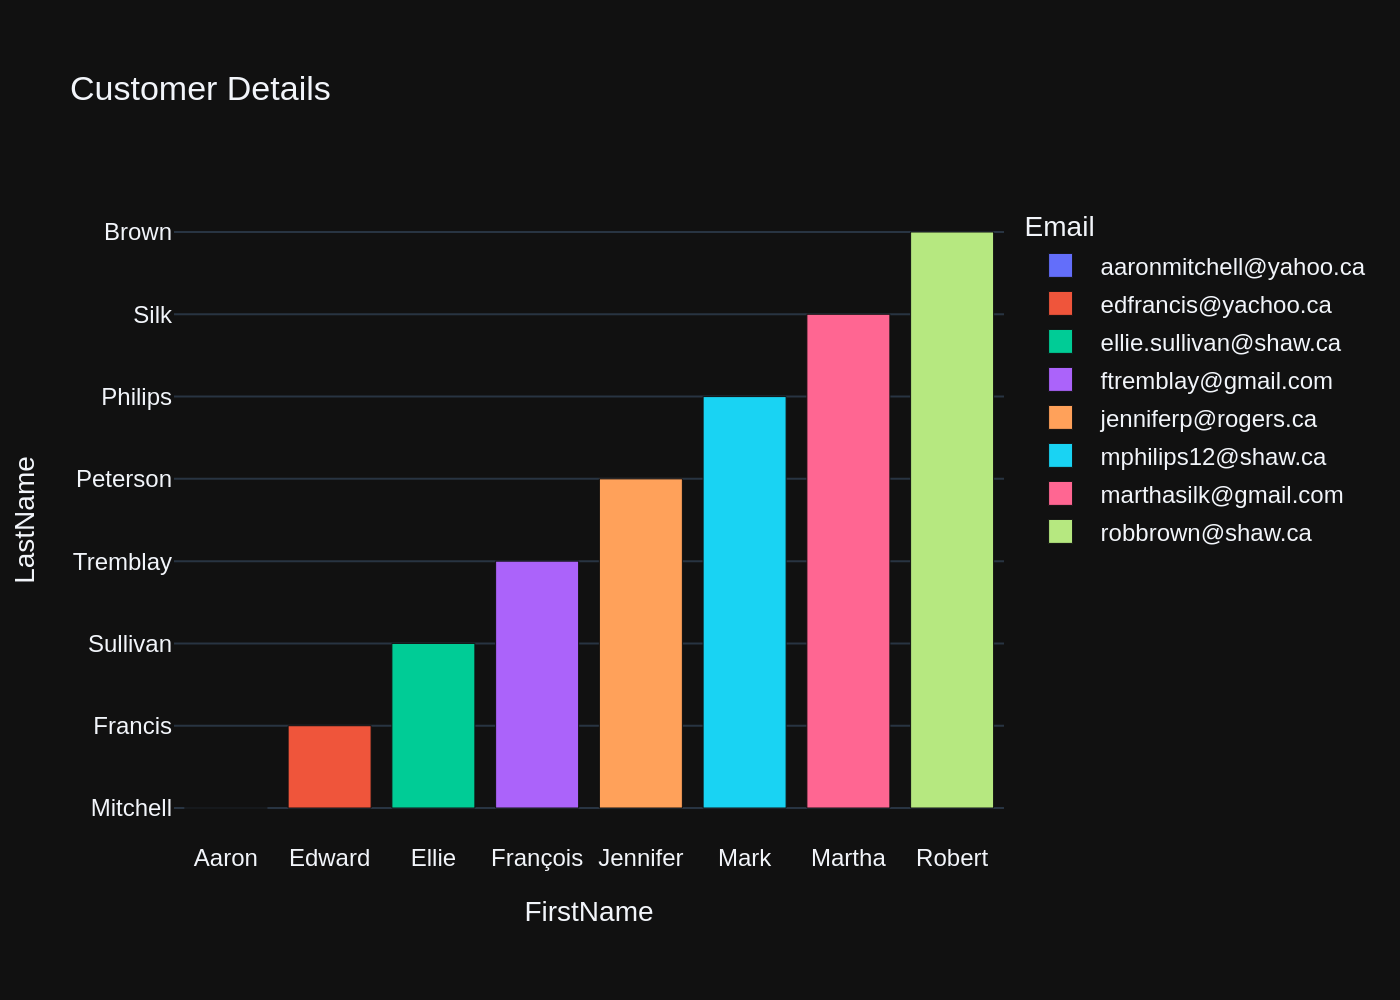





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName ,  LastName FROM customers WHERE CustomerId IN ( SELECT CustomerId FROM invoices GROUP BY CustomerId ORDER BY COUNT(*) DESC LIMIT 1 )


[( <DataFrame> )]
queried dataframe



,FirstName,LastName
0,Luís,Gonçalves



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(value=df['FirstName'].values[0])
else:
    fig = px.bar(x=df['LastName'], y=df['FirstName'])

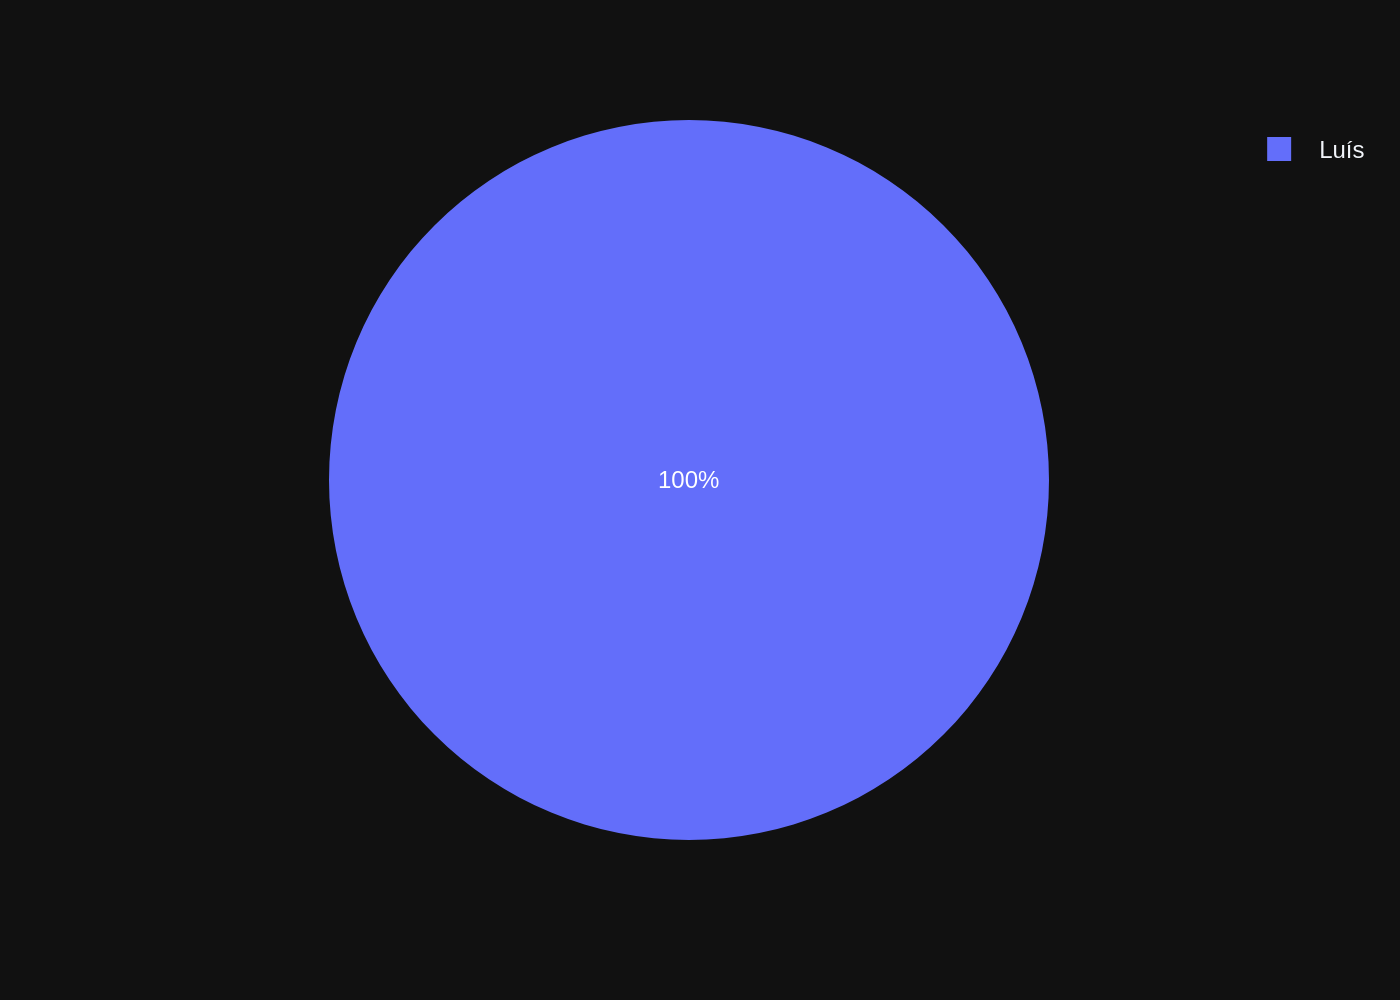





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.CustomerId ,  SUM(T2.Quantity) AS TotalQuantity FROM customers AS T1 INNER JOIN invoice_items AS T2 ON T1.CustomerId = T2.CustomerId GROUP BY T1.CustomerId ORDER BY TotalQuantity DESC LIMIT 1


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT t1.customerid ,  sum(T2.quantity) as totalquantity FROM customers AS t1 INNER JOIN invoice_items AS T2 ON t1.customerid = T2.customerid GROUP BY t1.CustomerId ORDER BY totalquantity DESC LIMIT 1


[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.CustomerId ,  SUM(T2.Quantity) AS TotalQuantity FROM customers AS T1 INNER JOIN invoice_items AS T2 ON T1.CustomerId = T2.CustomerId GROUP BY T1.CustomerId ORDER BY TotalQuantity DESC LIMIT 1


[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.customerid ,  SUM(T2.quantity) AS TotalQuantity FROM customers AS T1 INNER JOIN invoice_items AS T2 ON T1.customerid = T2.customerid GROUP BY T1.customerid ORDER BY TotalQuantity DESC LIMIT 1





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT I.CustomerId ,  SUM(I.Quantity) as TotalAlbumQuantity FROM invoice_items AS I JOIN invoices AS In ON I.InvoiceId = In.InvoiceId GROUP BY I.CustomerId ORDER BY TotalAlbumQuantity DESC LIMIT 5



[( <SQL> )]
generated SQL statement



SELECT I.CustomerId ,  SUM(I.Quantity) as TotalAlbumQuantity FROM invoice_items AS I JOIN invoices AS In ON I.InvoiceId = In.InvoiceId GROUP BY I.CustomerId ORDER BY TotalAlbumQuantity DESC LIMIT 5


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT I.CustomerId ,  SUM(I.Quantity) as TotalAlbumQuantity FROM invoice_items AS I JOIN invoices AS In ON I.InvoiceId = In.InvoiceId GROUP BY I.CustomerId ORDER BY TotalAlbumQuantity DESC LIMIT 5


[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT i.customerid ,  SUM(i.quantity) as totalalbumquantity FROM invoice_items AS i JOIN invoices AS In ON i.invoiceid = in.invoiceid GROUP BY i.customerid ORDER BY totalalbumquantity DESC LIMIT 5


[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT i.customerid ,  SUM(i.quantity) as totalalbumquantity FROM invoice_items AS i JOIN invoices AS In ON i.invoiceid = in.invoiceid GROUP BY i.customerid ORDER BY totalalbumquantity DESC LIMIT 5





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName ,  LastName FROM customers WHERE CustomerId IN ( SELECT CustomerId FROM invoices GROUP BY CustomerId ORDER BY SUM(UnitPrice * Quantity) DESC LIMIT 5 )


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName ,  LastName FROM customers WHERE CustomerId IN ( SELECT customerid FROM invoices GROUP BY CustomerId ORDER BY SUM(Total) DESC LIMIT 5 )


[( <DataFrame> )]
queried dataframe



,FirstName,LastName
0,Helena,Holý
1,Richard,Cunningham
2,Ladislav,Kovács
3,Hugh,O'Reilly
4,Luis,Rojas



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(dataframes=[df], labels={
        "value": "Total",
        "percent_change": "Change"
    })
else:
    fig = px.bar(df, x='FirstName', y='LastName')

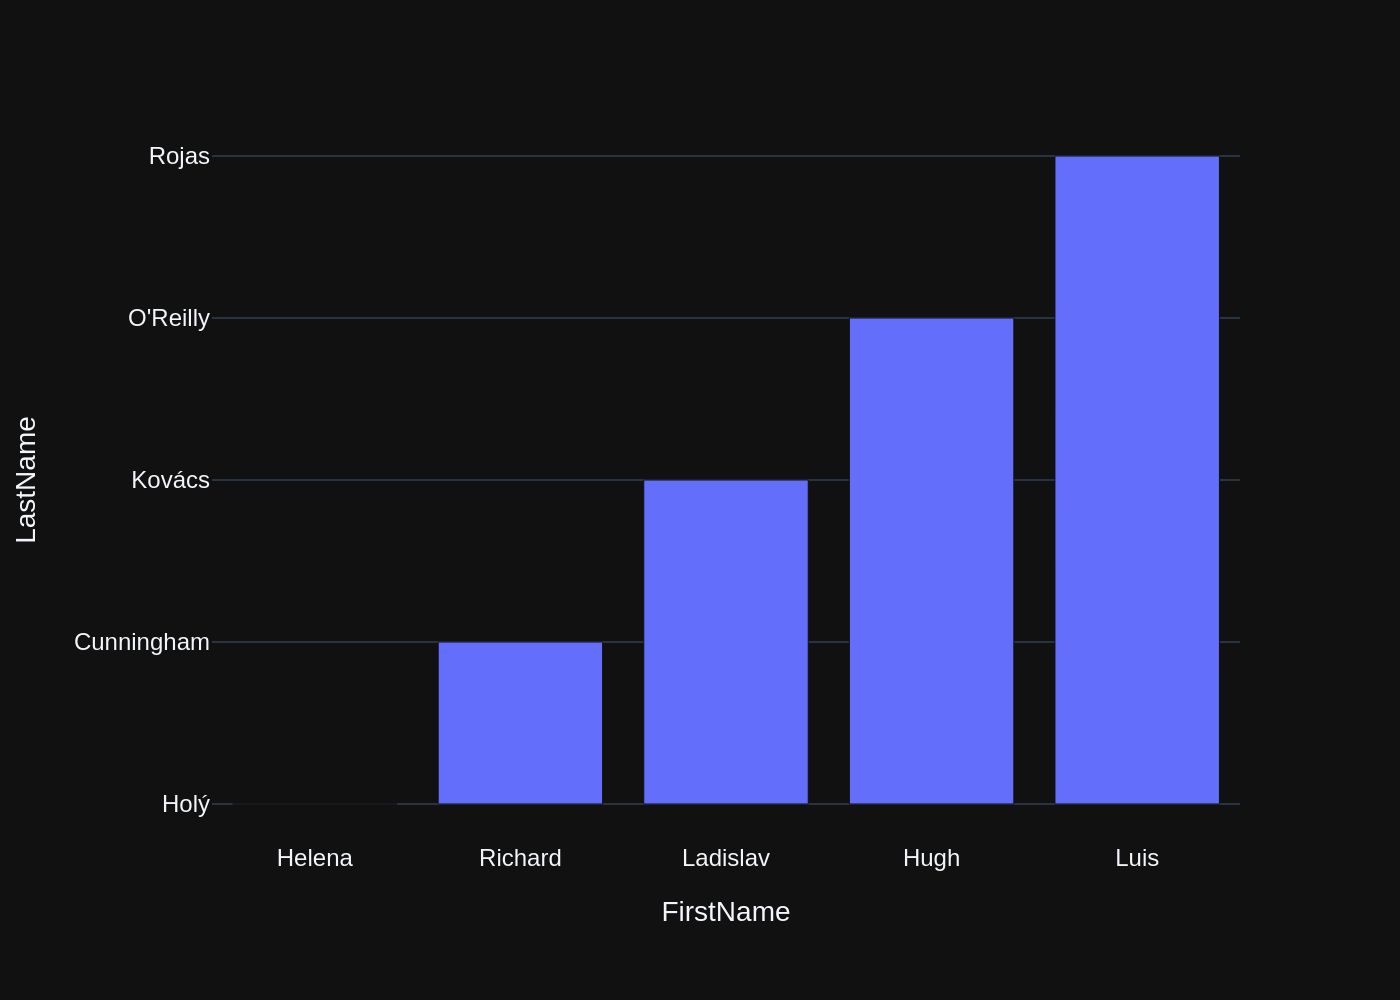





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name ,  SUM(T3.Duration) AS TotalDuration FROM playlists AS T1 JOIN playlist_track AS T2 ON T1.PlaylistId = T2.PlaylistId JOIN tracks AS T3 ON T2.TrackId = T3.TrackId GROUP BY T1.Name HAVING COUNT(*) >= 10 LIMIT 20


[( RETRY )]
***** 1 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name ,  SUM(T3.Duration) AS TotalDuration FROM playlists AS T1 JOIN playlist_track AS T2 ON T1.PlaylistId = T2.PlaylistId JOIN tracks AS T3 ON T2.TrackId = T3.TrackId GROUP BY T1.Name ,  T3.Name HAVING COUNT(*) >= 10 LIMIT 20


[( RETRY )]
***** 2 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT t1.name ,  SUM(t3.duration) AS TotalDuration FROM playlists AS T1 JOIN playlist_track AS T2 ON t1.playlistid = t2.playlistid JOIN tracks AS t3 ON t2.trackid = t3.trackid GROUP BY T1.Name HAVING COUNT(*) >= 10 LIMIT 20


[( RETRY )]
***** 3 *****


Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.name ,  SUM(T3.Duration) AS TotalDuration FROM playlists AS T1 JOIN playlist_track AS T2 ON T1.PlaylistId = T2.PlaylistId JOIN tracks AS T3 ON T2.TrackId = T3.TrackId GROUP BY T1.name ORDER BY T2.Count ,  TotalDuration DESC LIMIT 20





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.Name FROM albums AS T1 INNER JOIN artists AS T2 ON T1.ArtistId = T2.ArtistId WHERE T1.AlbumId IN ( SELECT AlbumId FROM tracks GROUP BY AlbumId HAVING COUNT(DISTINCT GenreId) > 1 )


[( <DataFrame> )]
queried dataframe



,Name
0,Eric Clapton
1,Iron Maiden
2,Iron Maiden
3,Iron Maiden
4,Lenny Kravitz
5,Battlestar Galactica
6,Heroes
7,Lost
8,Lost
9,The Office



Ollama parameters:
model=qwen2.5-coder:1.5b,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

# Assuming df is already defined and contains the results of your query

if len(df) == 1:
    fig = px.indicator(
        title="Single Artist Result",
        value=df.iloc[0]["Name"],
        description="This artist has an album with tracks in multiple genres.",
        color='blue'
    )
else:
    # For more than one result, you would typically create a bar chart or line plot
    fig = px.bar(
        df,
        x="Name",
        y="TrackCount",  # Assuming 'TrackCount' is the column that represents the number of tracks in multiple genres for each artist
        title="Artist with Multiple Genre Tracks",
        color='blue'
    )

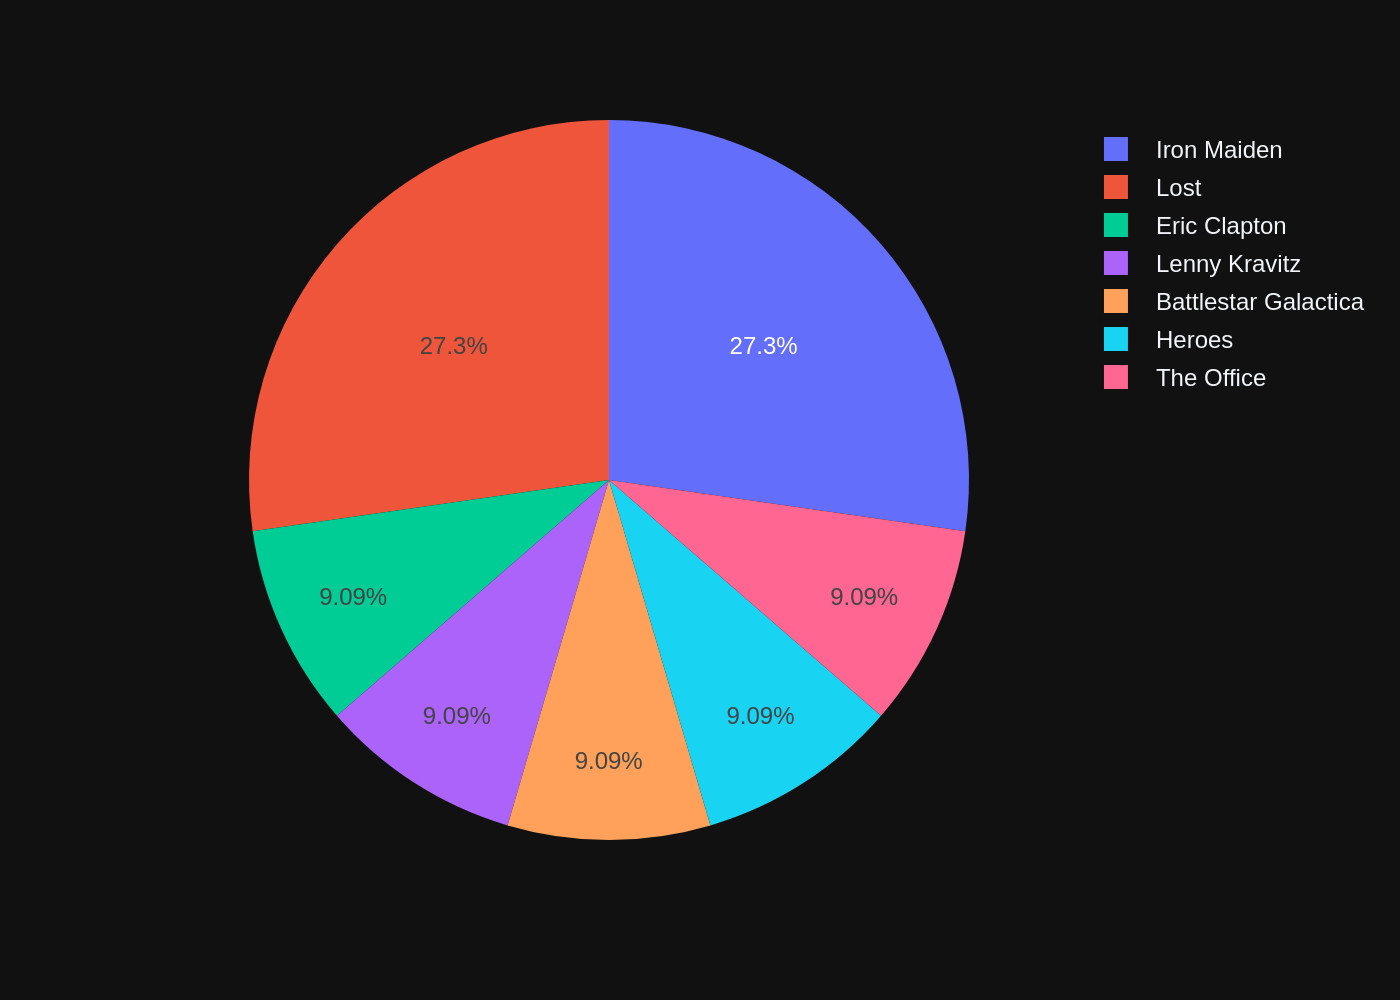

In [16]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [17]:
elapsed_time

139.33739113807678

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'qwen2.5-coder:1.5b' 
 took 139 sec
 run on 'ducklover1' 
 at 20241121-231044


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-qwen2.5-coder:1.5b-139s-ducklover1-20241121-231044.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,00118ff2-e744-57be-8deb-9ba68ca3fcb1-sql,\n Generating SQL for this ...,"SELECT T1.FirstName , T1.LastName , T2.First...",sql
1,09b5c84c-abca-5731-af61-7d148c5bd42f-sql,Can you list all tables in the SQLite database...,SELECT name FROM sqlite_master WHERE type='tab...,sql
2,198be005-3d10-5b95-8e39-9a73ae76e6bc-sql,List all invoices with a total exceeding $10,SELECT * FROM invoices WHERE Total > 10 LIMIT 20,sql
3,25b6b0b9-6352-55e8-9b3e-367726ab2661-sql,\n Generating SQL for this ...,SELECT * FROM invoices LIMIT 20,sql
4,277b70ca-2ba0-55ae-842f-1f85c75f2845-sql,Find the customer with the most invoices,"SELECT FirstName , LastName FROM customers WH...",sql
5,335140a4-7979-5d70-9455-a19b3107a378-sql,\n Generating SQL for this ...,"SELECT T1.FirstName , T1.LastName , T2.First...",sql
6,42264f7f-7ffe-5240-bba3-2bd5ed49cfdb-sql,List all employees and their reporting manager...,"SELECT T1.FirstName , T1.LastName , T2.First...",sql
7,460bcdd8-5c7e-5d72-a47c-2a22c45c6b72-sql,Identify artists who have albums with tracks a...,SELECT T2.Name FROM albums AS T1 INNER JOIN ar...,sql
8,51d90e46-63db-5a81-be60-eb330cf8e654-sql,Find the top 5 most expensive tracks (based on...,"SELECT Name , UnitPrice FROM tracks GROUP BY ...",sql
9,5e526ae4-4473-5cc5-9185-b16c465687c0-sql,How many customers are there,SELECT COUNT(*) FROM customers LIMIT 20,sql


In [21]:
df_training_data.to_csv(file_csv, index=False)